# **Proyecto Final - Caso de Estudio 07 - CreditScoring**

### **Información del Taller**

- **Fecha:** 11/2025
- **Docente:** Robert Erick García 
- **Integrantes:** Juan Diego Rojas Abarka - Jilmar Said Veloza - Andres Felipe Galvis - Axel Dereck Gutierrez

<div id = "id0" >

## **Tabla de Contenido**

- [1. Comprensión del problema](#id1)
- [2. Carga de Librerías](#id2)
- [3. Carga de Datos](#id3)
- [4. Comprensión de Problema](#id4)
- [5. Análisis exploratorio de datos](#id5)
- [6. Preparación de los Datos](#id6)
- [7. Modelado y Comparación de Algoritmos](#id7)
- [8. Evaluación de Modelos](#id8)
- [9. Revisión de Modelo Final](#id9)
- [10. Comunicación ejecutiva de resultados](#id10)
- [11. Guardado del Modelo para la Web-App](#id11)



<div id = "id1" >

## **1. Comprensión del problema**

### ***1.1 Contexto del negocio***

La entidad financiera desea optimizar su proceso de otorgamiento de crédito mediante la estimación temprana del riesgo de default de los solicitantes. El incumplimiento en los pagos no solo representa una pérdida directa, sino también un incremento en las provisiones obligatorias que afectan la capacidad del banco para invertir o prestar a otros clientes.

Para mejorar la toma de decisiones y minimizar pérdidas, el banco requiere un modelo predictivo de riesgo crediticio capaz de anticipar qué clientes podrían presentar dificultades financieras en los próximos dos años.

### ***1.2 Definición del problema de negocio***

El objetivo del área de riesgos es determinar, para cada solicitante, la probabilidad de que incumpla el pago de sus obligaciones dentro de los próximos 24 meses.

El dataset CreditScoring.csv contiene información histórica de clientes y si estos presentaron default o no, lo cual permite desarrollar un modelo de clasificación supervisada.

### ***1.3 Objetivos***

#### ***1.3.1 Objetivo principal***

Construir un modelo predictivo que estime la probabilidad de default utilizando las variables del historial crediticio, demográficas y de comportamiento financiero del cliente.

#### ***1.3.2 Objetivos específicos***

Encontrar las variables que más explican el riesgo de incumplimiento.

Entrenar un modelo de clasificación confiable y estable (ej.: AUC > 0.70).

Convertir la probabilidad en un score crediticio fácil de usar para el banco.

Proveer interpretabilidad para regulación, auditorías y explica­ciones a clientes.

### ***1.4 Variables relevantes del dataset***

Aquí se detallan las variables tal como aparecen en el dataset y su relevancia para el negocio:

#### ***1.4.1 Variable objetivo (target)***
| Variable                                 | Descripción                                                                                                       | Tipo                                                                        |
| ---------------------------------------- | ----------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------- |
| **SeriousDlqin2yrs** | Indica si el cliente cayó en default grave en los últimos 2 años (1 = sí, 0 = no). | Variable binaria |

Esta es la variable que el modelo debe predecir.

#### ***1.4.2 Variables predictoras (input features)***

| Variable                                 | Descripción                                                                                                       | Relevancia                                                                        |
| ---------------------------------------- | ----------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------- |
| **RevolvingUtilizationOfUnsecuredLines** | Saldo total de tarjetas de crédito y líneas de crédito personales dividido por la suma de los límites de crédito. | Indicador de endeudamiento; valores altos sugieren posible sobreuso de crédito.   |
| **age**                                  | Edad del prestatario en años.                                                                                     | Clientes muy jóvenes o muy mayores pueden presentar patrones de riesgo distintos. |
| **NumberOfTime30-59DaysPastDueNotWorse** | Número de veces que ha estado atrasado entre 30 y 59 días sin haber empeorado.                                    | Fuerte indicador temprano de comportamiento moroso.                               |
| **DebtRatio**                            | Pagos mensuales de deuda, pensiones y costo de vida dividido por el ingreso bruto mensual.                        | Un ratio alto implica presión financiera, mayor riesgo.                           |
| **MonthlyIncome**                        | Ingreso mensual.                                                                                                  | Ingresos bajos incrementan probabilidad de impago.                                |
| **NumberOfOpenCreditLinesAndLoans**      | Número de préstamos abiertos y líneas de crédito activas.                                                         | Útil para evaluar diversificación vs. saturación de crédito.                      |
| **NumberOfTimes90DaysLate**              | Veces que ha estado atrasado 90 días o más.                                                                       | Uno de los predictores más críticos del default.                                  |
| **NumberRealEstateLoansOrLines**         | Cantidad de préstamos hipotecarios o inmobiliarios.                                                               | Clientes con bienes pueden ser más estables, aunque también más endeudados.       |
| **NumberOfTime60-89DaysPastDueNotWorse** | Veces que ha estado atrasado 60-89 días, pero sin empeorar en los últimos 2 años.                                 | Indicador de riesgo moderado/alto.                                                |
| **NumberOfDependents**                   | Número de dependientes en la familia (cónyuge, hijos).                                                            | Más dependientes → mayor carga financiera.                                        |


### ***1.5 Resultado esperado para el negocio***

El modelo permitirá:

Reducir aprobación de clientes de alto riesgo.

Optimizar tasas y límites quienes sí cumplen.

Disminuir pérdidas esperadas (Expected Loss).

[Regresar a la Tabla de Contenido](#id0)

<div id = "id2" >

## **2. Carga de Librerías**

In [2]:
# librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import joblib

from ydata_profiling import ProfileReport

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import ( roc_curve, roc_auc_score, precision_score,recall_score, f1_score, confusion_matrix, classification_report )

# warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option("display.max_rows", None)  # sin límite de filas

[Regresar a la Tabla de Contenido](#id0)

<div id = "id3" >

## **3. Carga de Datos**

In [3]:
import pandas as pd

df = pd.read_csv("../Data/CreditScoring.csv")
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


[Regresar a la Tabla de Contenido](#id0)

<div id = "id4" >

## **4. Descripción y limpieza**

### ***4.1 Información de datasets cargados***

#### ***4.1.1 Dimensiones del Dataset***

In [5]:
df.shape

(150000, 12)

#### ***4.1.2 Tipos de Datos***

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

[Regresar a la Tabla de Contenido](#id0)

### ***4.2 Ajustando los tipos de datos***

Todos los datos son numericos por lo que no es necesario un ajuste de los tipos de datos por ahora

[Regresar a la Tabla de Contenido](#id0)

### ***4.3 Identificación de Datos duplicados completos***

In [7]:
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

0


No existen datos duplicados

[Regresar a la Tabla de Contenido](#id0)

### ***4.4 Visualización de datos nulos***

In [8]:
df.isnull().sum() / len(df) * 100

ID                                       0.000000
SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.820667
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.616000
dtype: float64

[Regresar a la Tabla de Contenido](#id0)

<div id = "id5" >

## **5. Análisis exploratorio de datos**

Exploraremos la estructura del dataset, sus características, composición, ausencia de valores nulos, distribuciones y relaciones con la variable objetivo **SeriousDlqin2yrs**

### ***5.1 Análisis Descriptivo del Data profiling***

In [9]:
profile = ProfileReport(df, title='EDA Profiling Report', minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 179.62it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

[Regresar a la Tabla de Contenido](#id0)

### ***5.1.1 Variables Númericas***

In [10]:
# Descripción Estadística
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("Numerical columns:", numerical_cols.tolist())
df[numerical_cols].describe()

Numerical columns: ['ID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


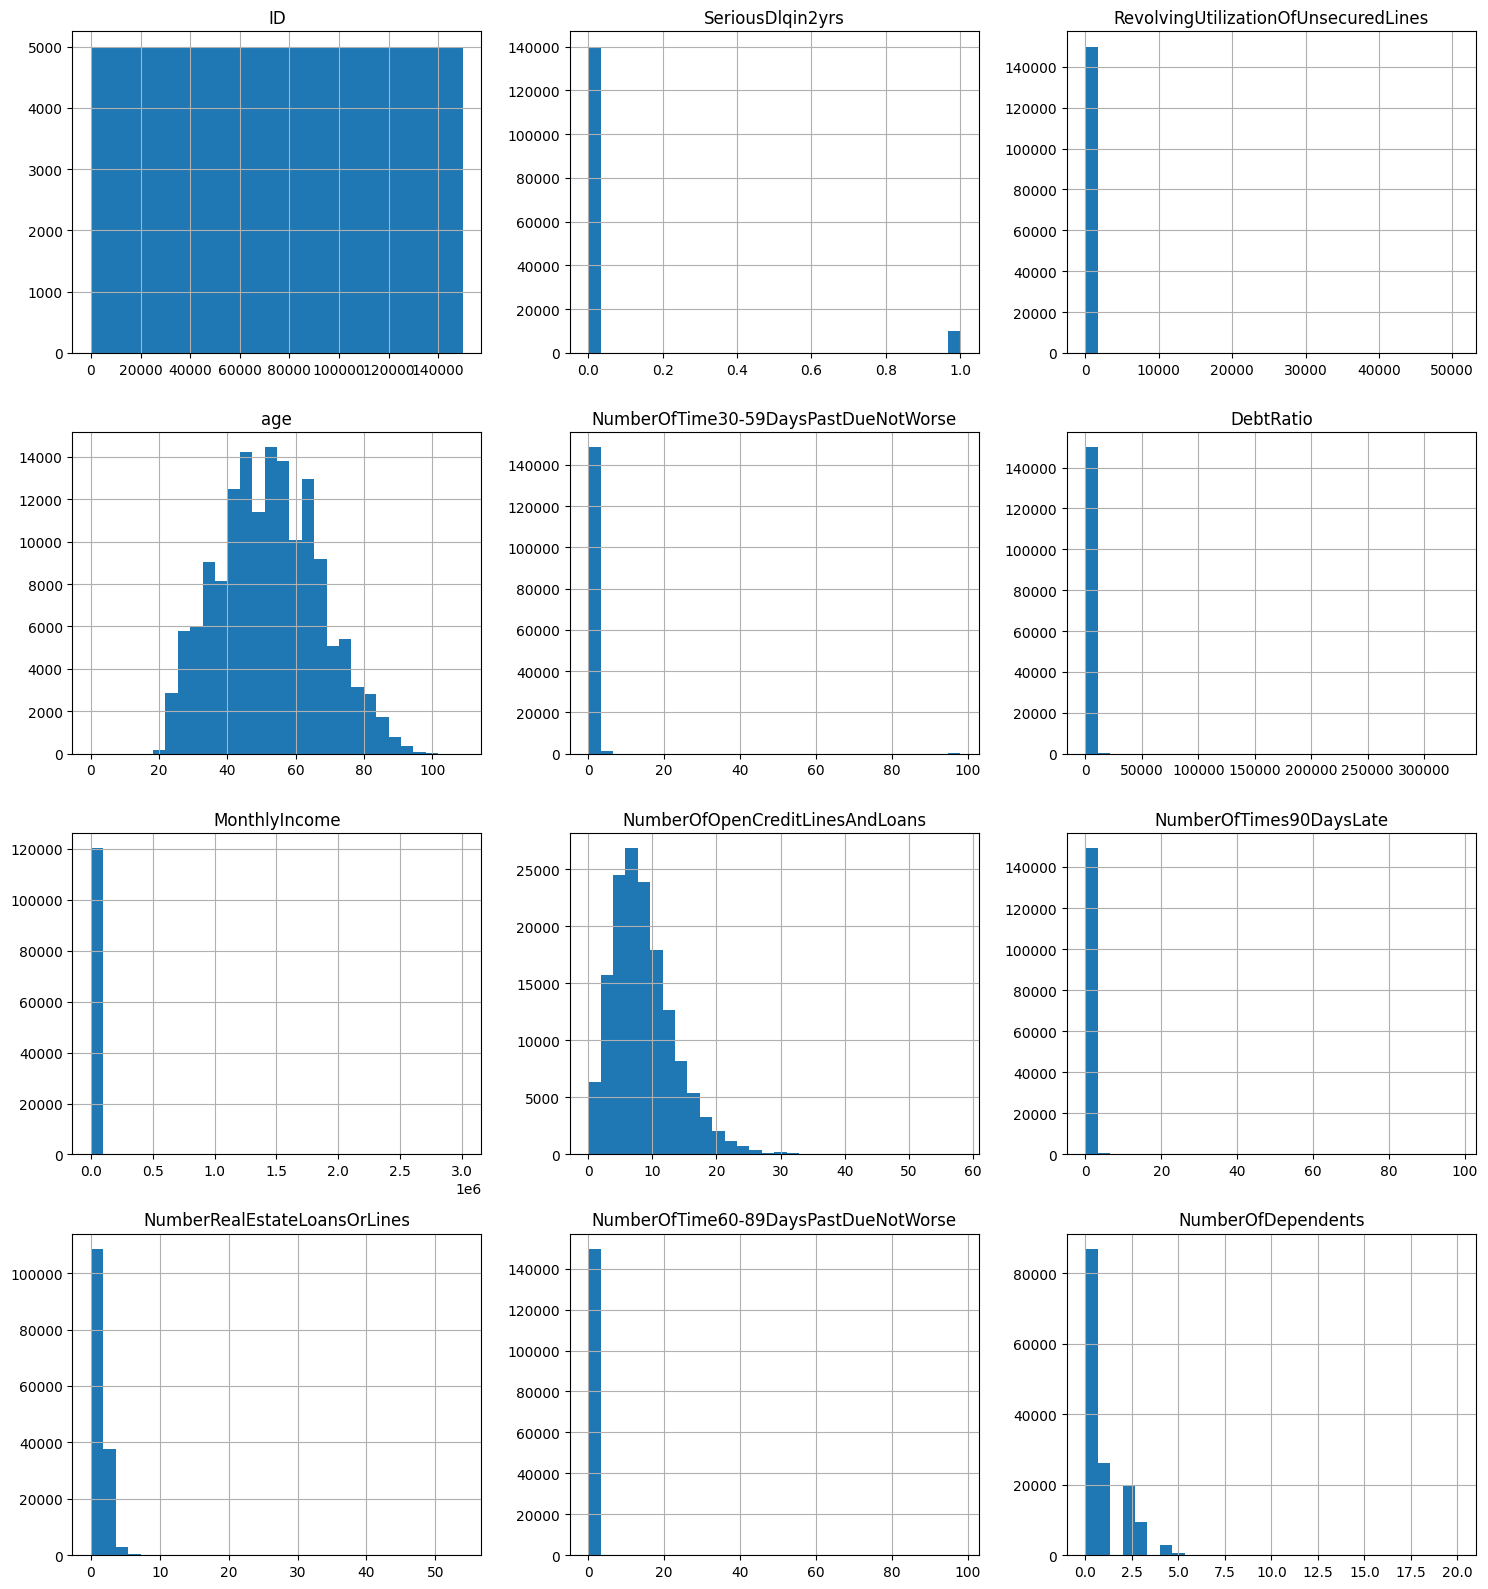

In [11]:
n = len(numerical_cols)
rows = int(np.ceil(n / 3))

fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, c in enumerate(numerical_cols):
    df[c].hist(ax=axes[i], bins=30)
    axes[i].set_title(c)

# Remove empty axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

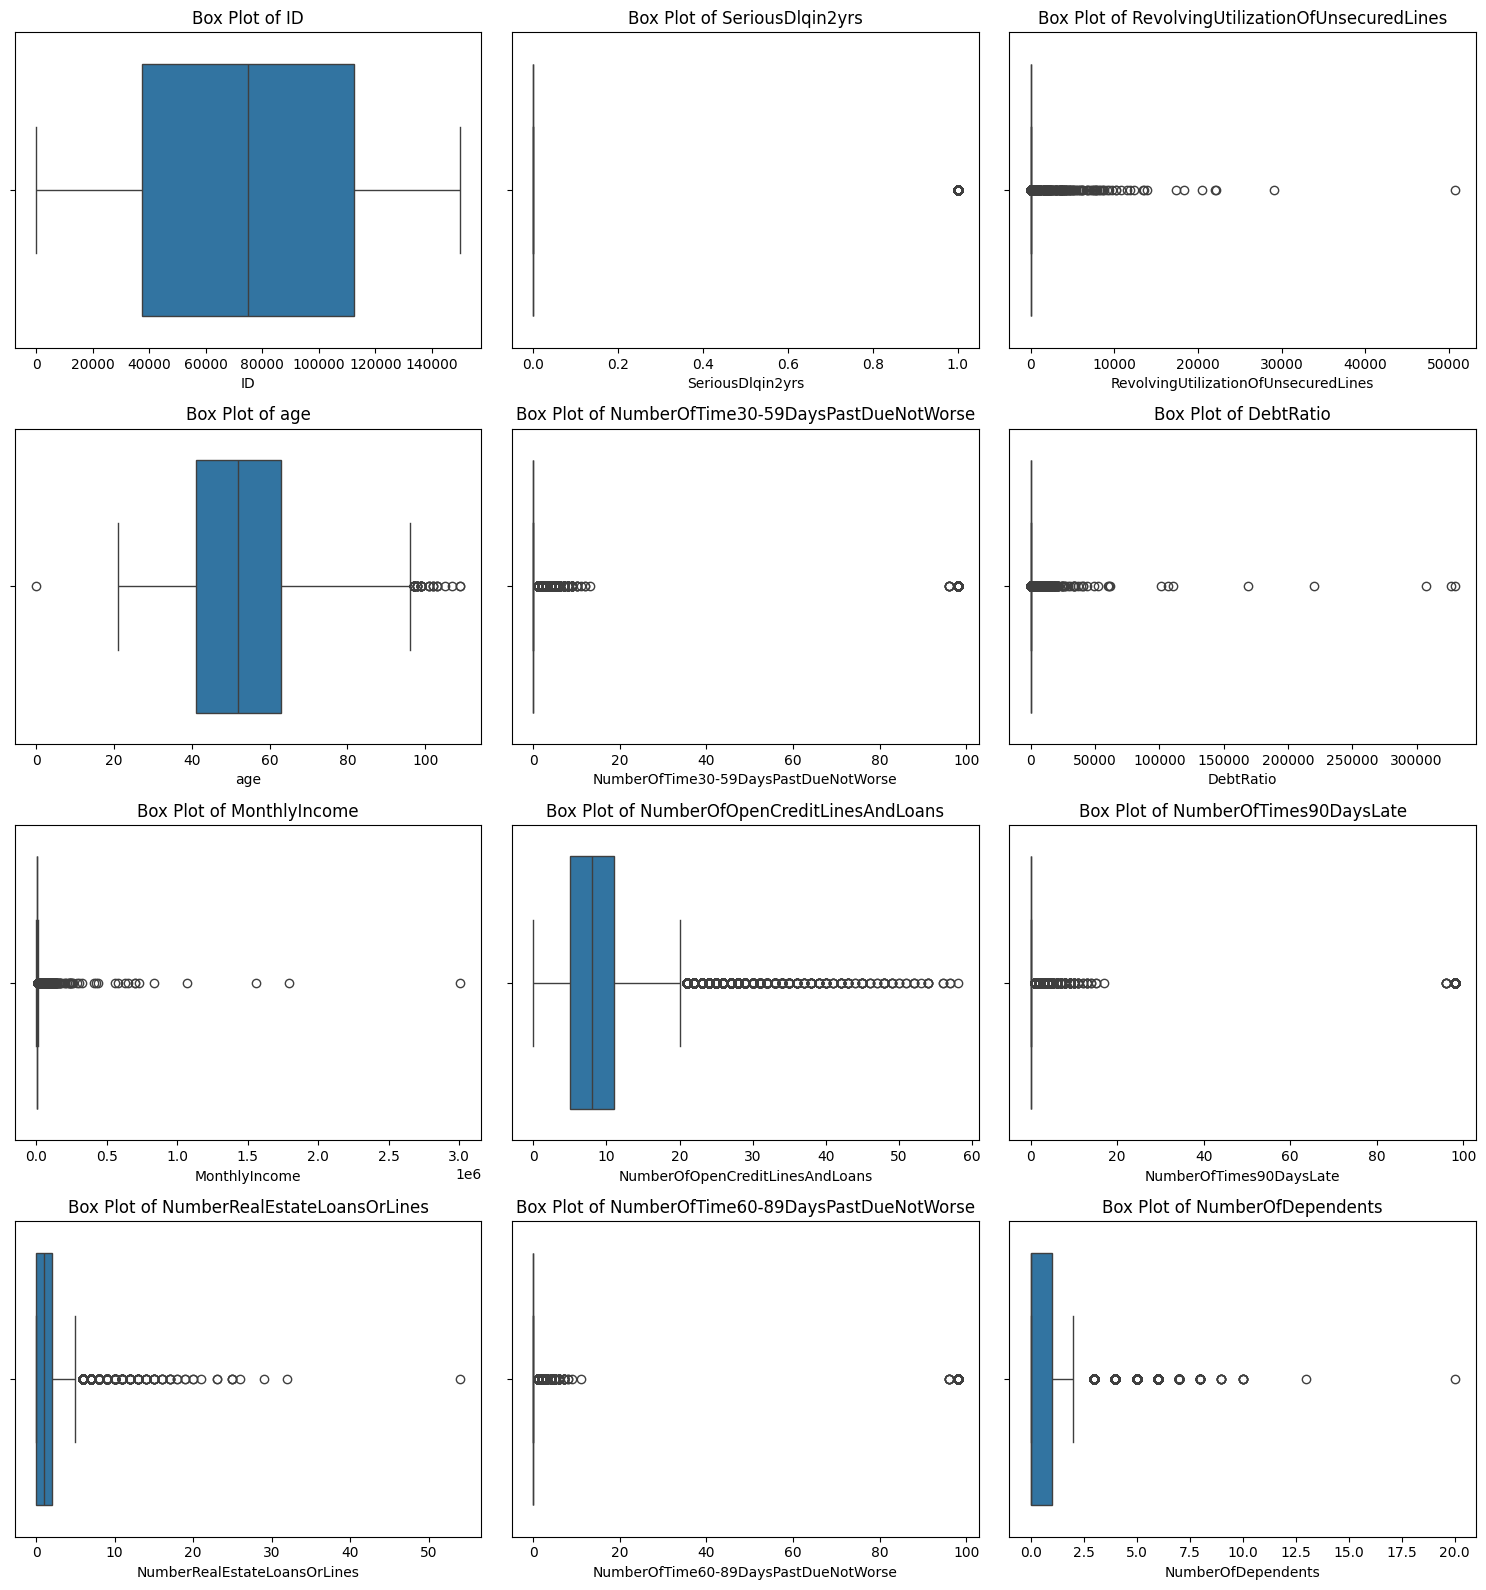

In [12]:
# Boxplots in 3 columns
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

# Remove empty axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

[Regresar a la Tabla de Contenido](#id0)

### ***5.1.2 Variables Categoricas***

No existen Variables Categoricas

[Regresar a la Tabla de Contenido](#id0)

### ***5.2 Relación entre Numéricas y la Variable Objetivo (Boxplots)***

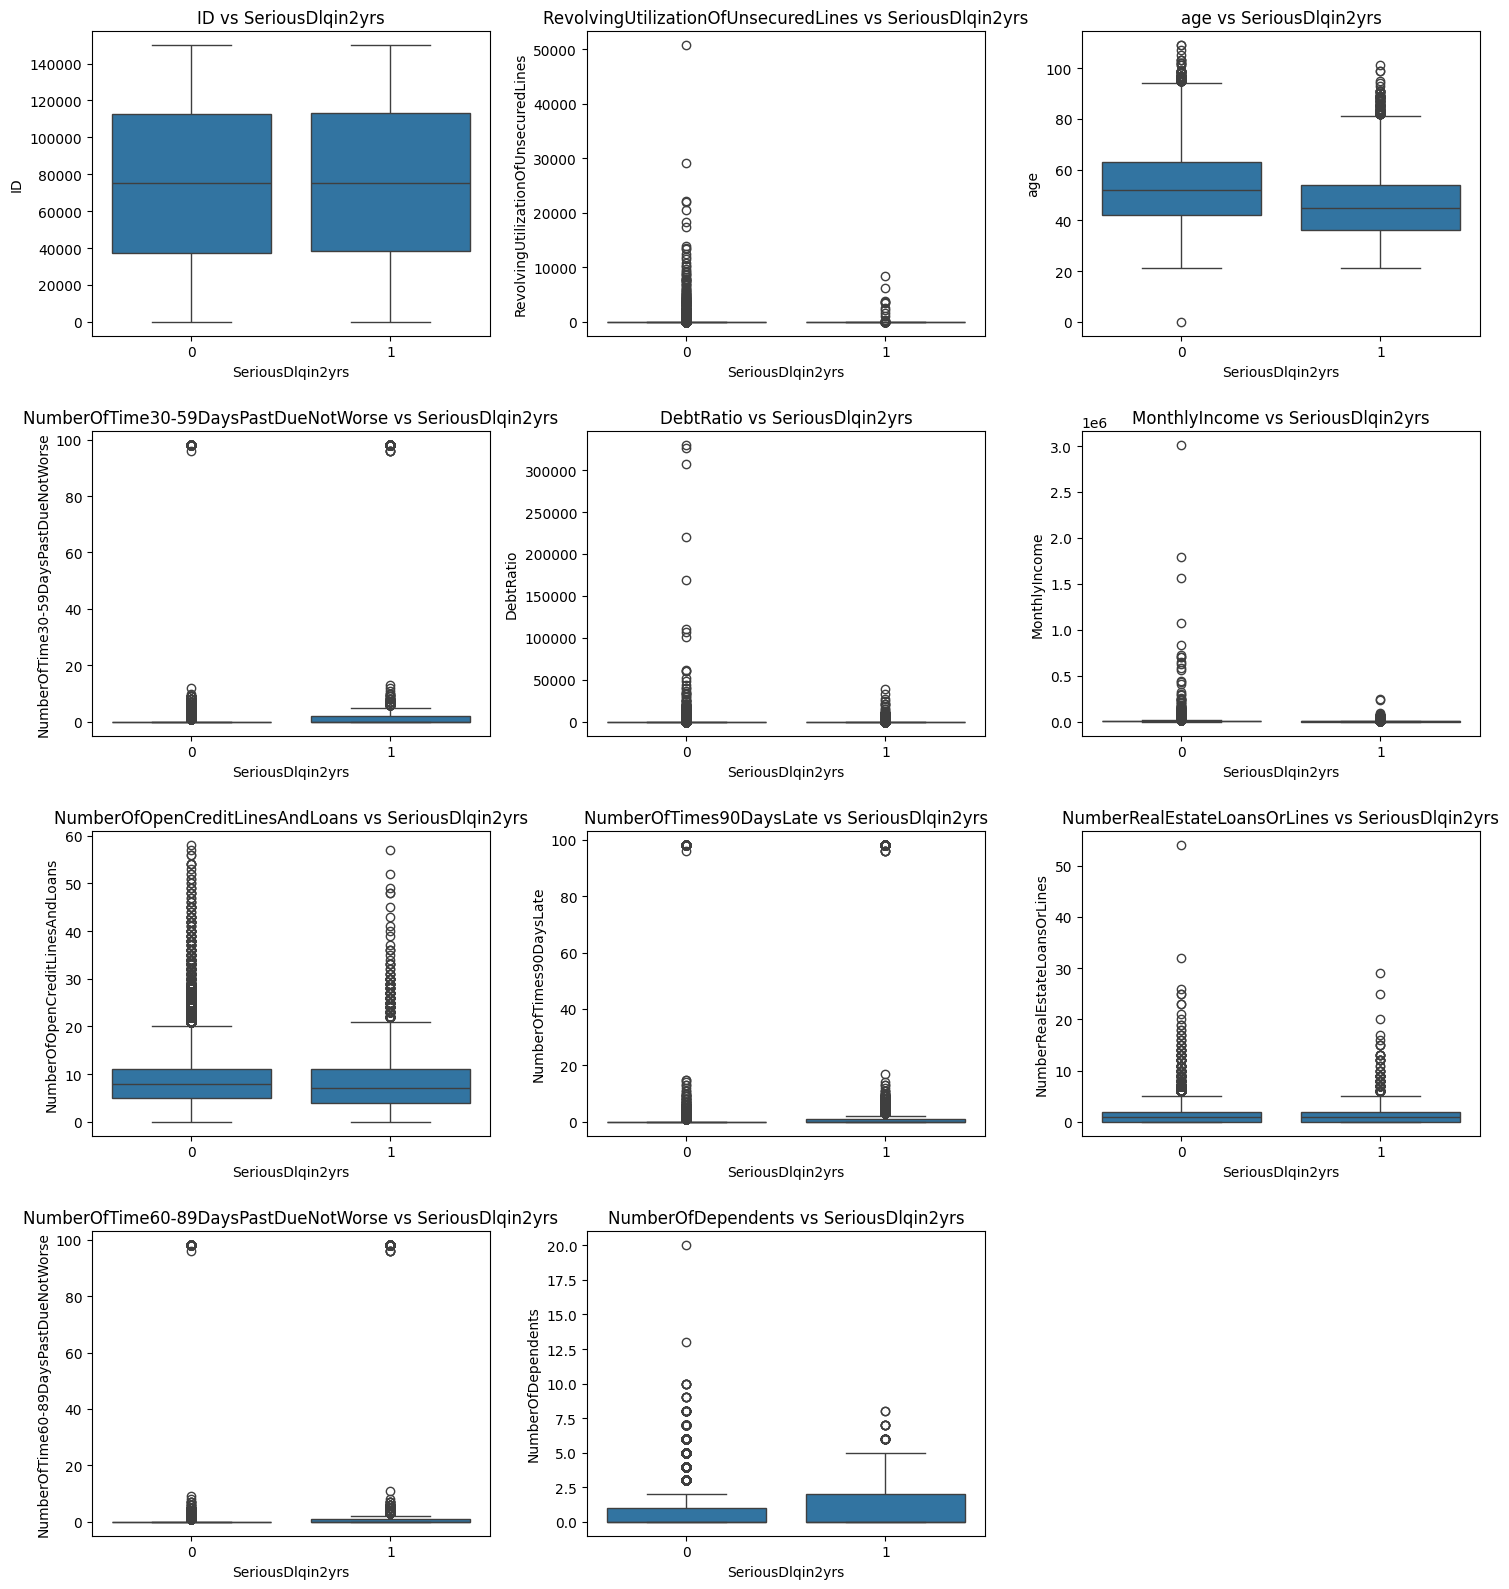

In [13]:
target = "SeriousDlqin2yrs"
num_cols = [c for c in numerical_cols if c != target]

n = len(num_cols)
rows = int(np.ceil(n / 3))

fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=target, y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs {target}')
    axes[i].set_xlabel(target)
    axes[i].set_ylabel(col)

# Eliminar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

[Regresar a la Tabla de Contenido](#id0)

### ***5.3 Matriz de Correlación***

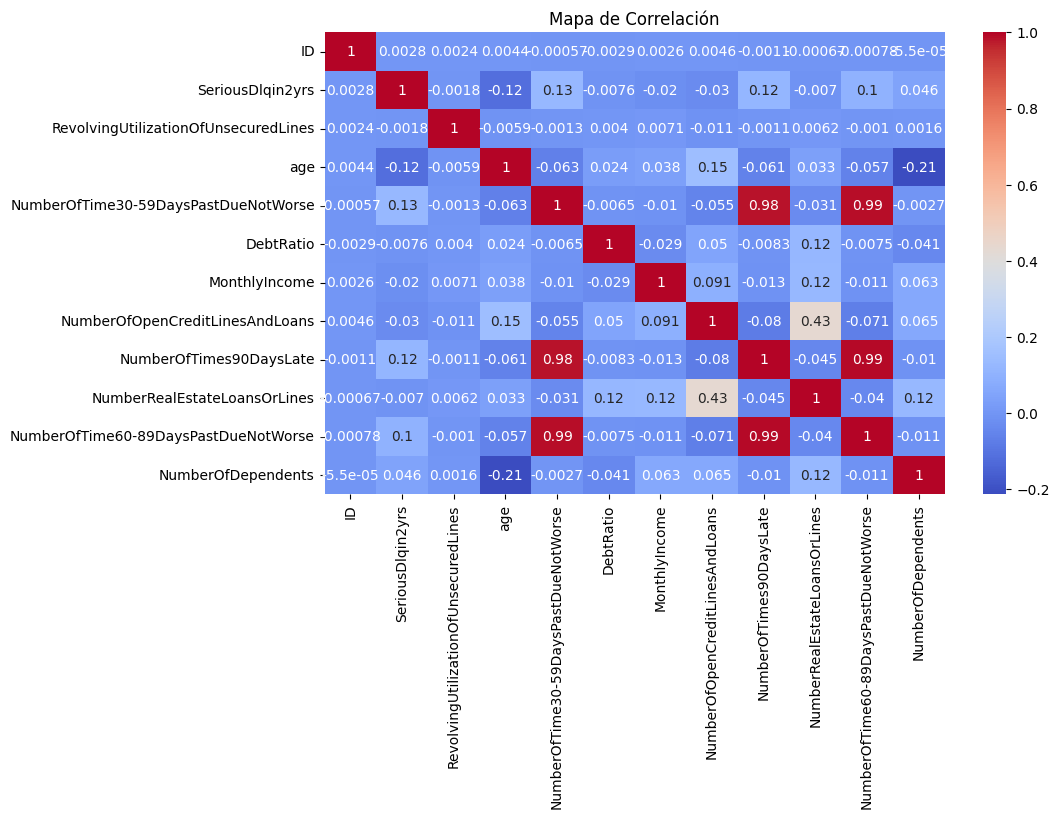

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Mapa de Correlación")
plt.show()

[Regresar a la Tabla de Contenido](#id0)

### ***5.4 Conclusiones Intermedias del EDA***

1. El dataset presenta buena estructura y es ideal para modelamiento.
2. Hay pocos valores nulos, concentrados en MonthlyIncome y NumberOfDependents.
3. Existen outliers extremadamente grandes en moras (valores de 98) → deben corregirse.
4. El target está fuertemente desbalanceado, por lo que SMOTE es necesario.
5. Las variables con mayor impacto potencial en el default son:

    NumberOfTimes90DaysLate

    NumberOfTime60-89DaysPastDueNotWorse

    NumberOfTime30-59DaysPastDueNotWorse

6. Todas las variables son numéricas, lo cual simplifica el preprocesamiento.

[Regresar a la Tabla de Contenido](#id0)

<div id = "id6" >

## **6. Preparación de los Datos**

#### ***6.1 Variables Irrelevantes***
La columna ID es irrelevante para el estudio por lo cual se quitara

In [15]:
df_copia = df.drop(columns="ID")

[Regresar a la Tabla de Contenido](#id0)

### ***6.2 Tratamiento de Datos nulos***

In [16]:
df_copia.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

Solo existen dos variables con datos nulos y estos representan menos de un 20% y menos de un 3% del total de datos respectivamente

Se requiere imputación, se hara con KNNImputer porque mantiene relaciones entre variables.

In [17]:
df_copia.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Es imposible que un cliente tenga 98 moras; esto indica errores de registro o valores inflados.

MonthlyIncome tiene valores máximos > 300,000 USD

DebtRatio tiene valores > 50, lo cual es inusual (ratios normales son 0–2)

Estos outliers deben tratarse.


El dataset está altamente desbalanceado:

Clase 0 (no default): ~93%

Clase 1 (default): ~7%

Esto coincide con problemas reales de crédito → y justifica el uso de SMOTE.

#### ***6.3 Imputación de valores faltantes***

In [18]:
df_copia['MonthlyIncome'] = df_copia['MonthlyIncome'].fillna(df_copia['MonthlyIncome'].median())
df_copia['NumberOfDependents'] = df_copia['NumberOfDependents'].fillna(df_copia['NumberOfDependents'].median())

In [19]:
df_copia.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

[Regresar a la Tabla de Contenido](#id0)

#### ***6.5 Variable Objetivo***

In [20]:
df_copia['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

[Regresar a la Tabla de Contenido](#id0)

#### ***6.6 Winsorización de outliers***

Winsorizar es una técnica estadística para reducir el impacto de los valores extremos (outliers) en un conjunto de datos, sin eliminarlos, sino recortándolos a un límite razonable.

In [21]:
variables_winsor = [
    'RevolvingUtilizationOfUnsecuredLines',
    'DebtRatio',
    'MonthlyIncome',
    'NumberOfTimes90DaysLate',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfTime30-59DaysPastDueNotWorse'
]

for var in variables_winsor:
    df_copia[var] = df_copia[var].clip(
        lower=df_copia[var].quantile(0.01),
        upper=df_copia[var].quantile(0.99)
    )

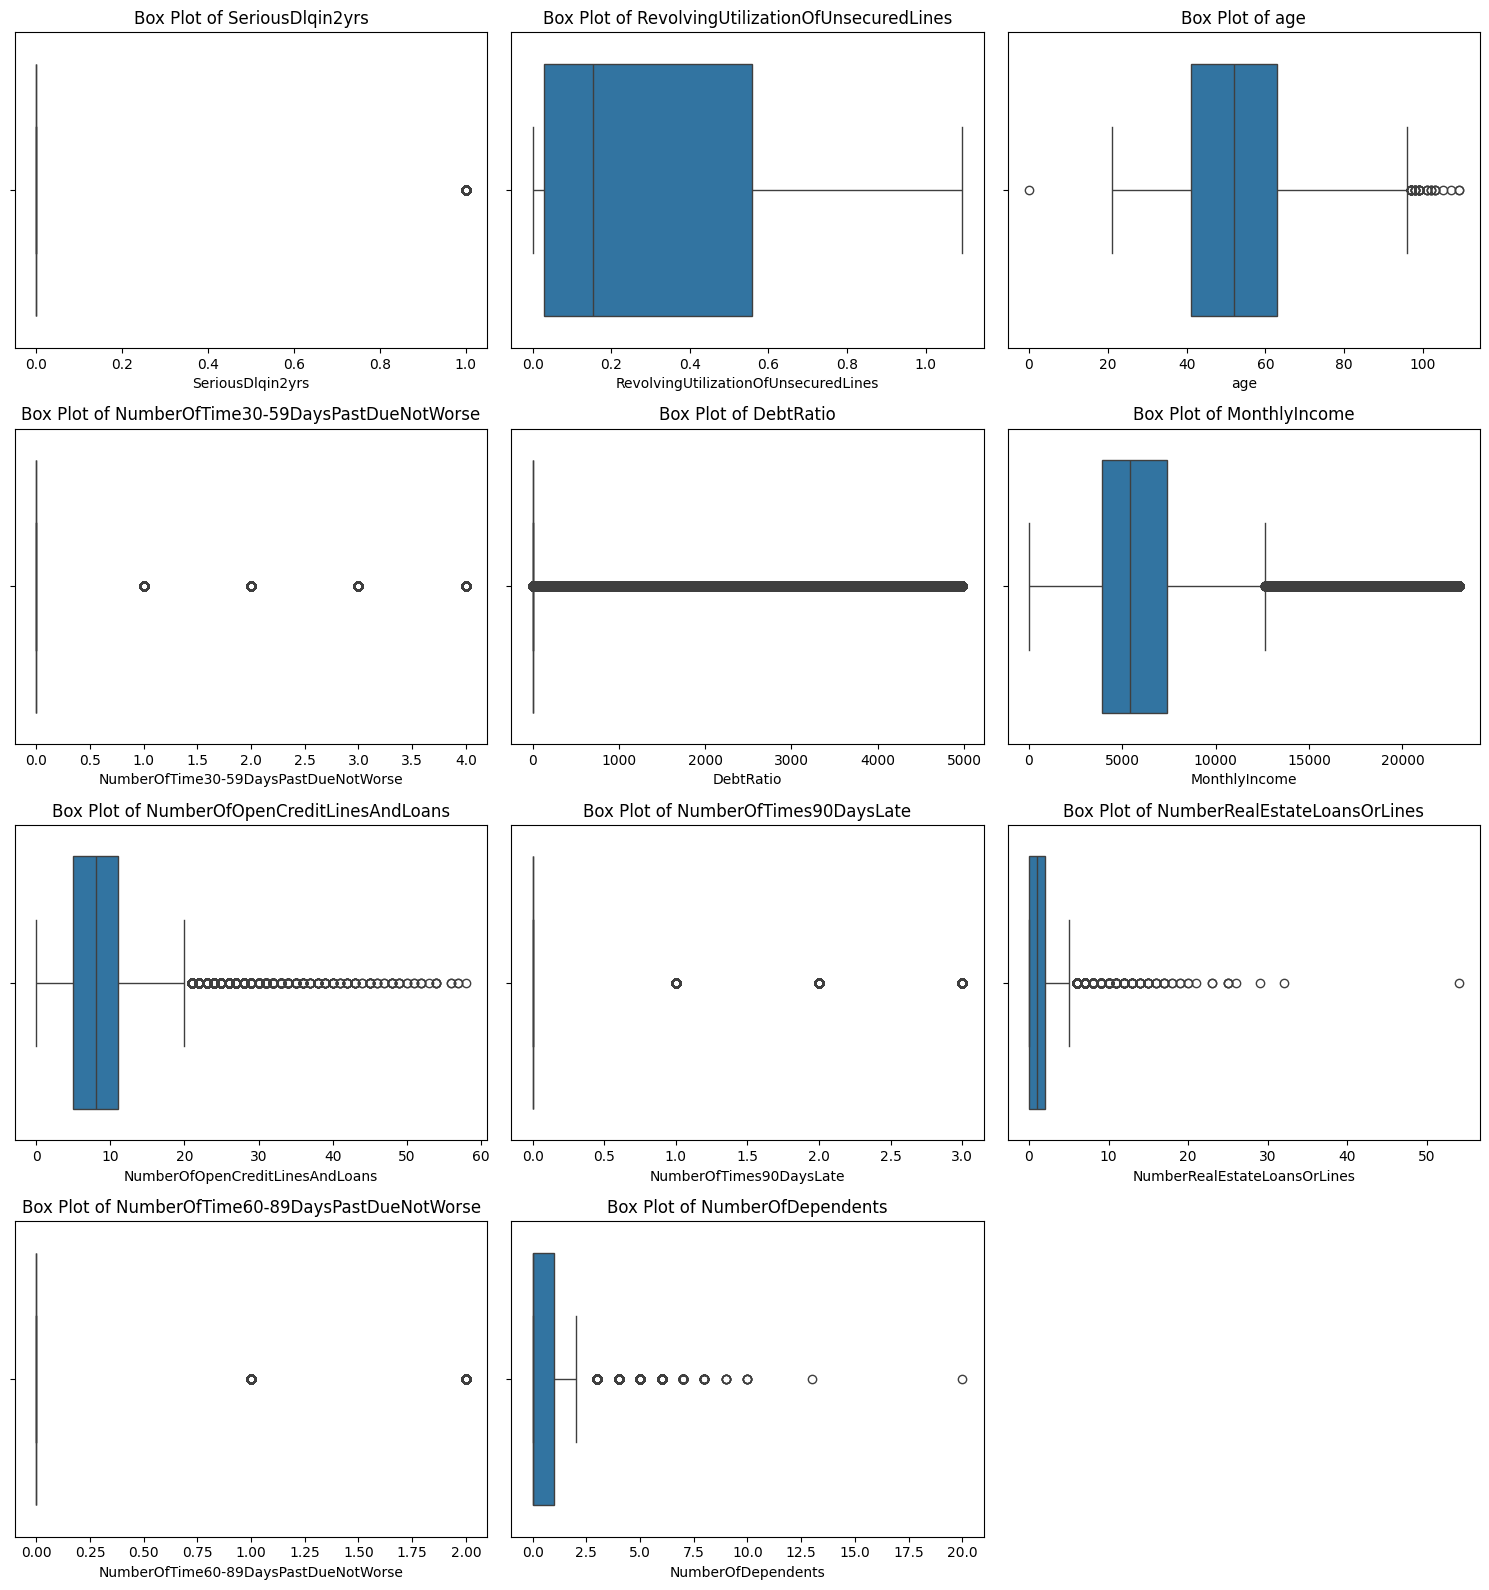

In [22]:
# Boxplots in 3 columns
numerical_cols2 = df_copia.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols2):
    sns.boxplot(x=df_copia[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

# Remove empty axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

[Regresar a la Tabla de Contenido](#id0)

#### ***6.7 División Train/Test antes de escalar***

In [23]:
X = df_copia.drop('SeriousDlqin2yrs', axis=1)
y = df_copia['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

stratify=y garantiza que ambas clases estén proporcionalmente representadas.

Se reserva 30% para prueba, adecuado para datasets grandes (150k filas).

[Regresar a la Tabla de Contenido](#id0)

#### ***6.8 Escalado***

Usamos MinMaxScaler porque:

Normaliza entre 0 y 1

Mantiene la forma de la distribución

Funciona bien con SMOTE

Evita que variables como DebtRatio o MonthlyIncome dominen por escala

In [24]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

[Regresar a la Tabla de Contenido](#id0)

#### ***6.9 Balanceo de Datos***

Debido a que el target está desbalanceado.

Para evitar que el modelo se sesgue, se aplicamos SMOTE solo al conjunto de entrenamiento

In [25]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

[Regresar a la Tabla de Contenido](#id0)

### ***Resultado final de la Preparación de los Datos***

Después de esta etapa se obtiene:

Un dataset limpio, sin valores nulos.

Outliers controlados mediante winsorización.

Variables escaladas entre 0 y 1.

Conjunto entrenamiento balanceado con SMOTE.

[Regresar a la Tabla de Contenido](#id0)

<div id = "id7" >

## **7. Modelado y Comparación de Algoritmos**

### ***7.1 Lista de valores resultado***

In [26]:
resultados = {
    "Modelo": [],
    "AUC": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

### ***7.2 Regresión Logistica***

In [27]:
# Modelo
lr = LogisticRegression(max_iter=500)
lr.fit(X_train_res, y_train_res)

#Predicciónes
y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

resultados["Modelo"].append("Regresión Logística")
resultados["AUC"].append(roc_auc_score(y_test, y_proba_lr))
resultados["Precision"].append(precision_score(y_test, y_pred_lr))
resultados["Recall"].append(recall_score(y_test, y_pred_lr))
resultados["F1-Score"].append(f1_score(y_test, y_pred_lr))

### ***7.3 K-Nearest Neighbors (KNN)***

In [28]:
# Modelo
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_res, y_train_res)

# Predicciones
y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:,1]

# Métricas
resultados["Modelo"].append("KNN (k=7)")
resultados["AUC"].append(roc_auc_score(y_test, y_proba_knn))
resultados["Precision"].append(precision_score(y_test, y_pred_knn))
resultados["Recall"].append(recall_score(y_test, y_pred_knn))
resultados["F1-Score"].append(f1_score(y_test, y_pred_knn))

### ***7.4 Random Forest***

In [29]:
# Modelo
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train_res, y_train_res)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:,1]

# Métricas
resultados["Modelo"].append("Random Forest")
resultados["AUC"].append(roc_auc_score(y_test, y_proba_rf))
resultados["Precision"].append(precision_score(y_test, y_pred_rf))
resultados["Recall"].append(recall_score(y_test, y_pred_rf))
resultados["F1-Score"].append(f1_score(y_test, y_pred_rf))

[Regresar a la Tabla de Contenido](#id0)

<div id = "id8" >

## **8. Evaluación de Modelos**

In [30]:
df_resultados = pd.DataFrame(resultados)
df_resultados

,Modelo,AUC,Precision,Recall,F1-Score
0,Regresión Logística,0.856900,0.220049,0.744348,0.339680
1,KNN (k=7),0.767035,0.192121,0.619348,0.293270
2,Random Forest,0.850863,0.338809,0.514295,0.408503


Las métricas más importantes son:

AUC → qué tan bien separa buenos/malos pagadores

Recall → capacidad de detectar morosos (clase 1)

Precision → qué tan correctas son las alarmas cuando decimos “moroso”

F1-score → equilibrio entre precision y recall

- La regresión logística detecta correctamente el 74% de los clientes que sí van a caer en default.

    Eso es muy valioso porque significa:

    Menos riesgos aprobados

    Menos pérdidas por cartera vencida

    Mejor control de mora temprana

    El costo es que la precisión baja implica falsos positivos (clientes que parecen riesgosos pero no lo son), algo aceptable en riesgo crediticio porque es preferible ser conservador al aprobar

- Random Forest es el modelo más equilibrado:

    Tiene mejor precisión, es decir:
    Cuando dice que un cliente es riesgoso, tiene razón más veces.

    Tiene el mejor F1, indicando un equilibrio sólido entre detectar morosos y no generar demasiadas alarmas falsas.

    AUC es competitivo (0.85).

- KNN:

    No captura bien los patrones del dataset

    Sufre por la cantidad de datos (150,000 filas es mucho para KNN)

    Tiene demasiados falsos positivos y falsos negativos

Conclusiones:

- Mejor para detección de morosos (Recall alto): Regresión Logística

    Perfecto cuando el banco quiere minimizar riesgos, aunque sea más restrictivo.

- Mejor equilibrio (F1 y precisión): Random Forest

    Ideal para un score más balanceado y decisiones crediticias más flexibles.

- Peor modelo: KNN

    Bajo rendimiento → se descarta.

#### ***8.1 Selección de modelo***

Seleccionamos la Regresión Logística como modelo principal para la predicción del riesgo de morosidad debido a su equilibrio entre desempeño predictivo, interpretabilidad y solidez estadística, características fundamentales en el ámbito del crédito y la gestión del riesgo financiero.

#### ***8.2 Optimización de Regresión Logistica (Grid Search)***

In [31]:
param_grid_lr = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs'],
    'max_iter': [500]
}

lr = LogisticRegression()

grid_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

grid_lr.fit(X_train_res, y_train_res)

print("Mejores parámetros:", grid_lr.best_params_)
print("Mejor AUC (train):", grid_lr.best_score_)

Mejores parámetros: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor AUC (train): 0.8578235976103725


[Regresar a la Tabla de Contenido](#id0)

<div id = "id9" >

## **9. Revisión de Modelo Final**

### ***9.1 Matriz de Confusión***

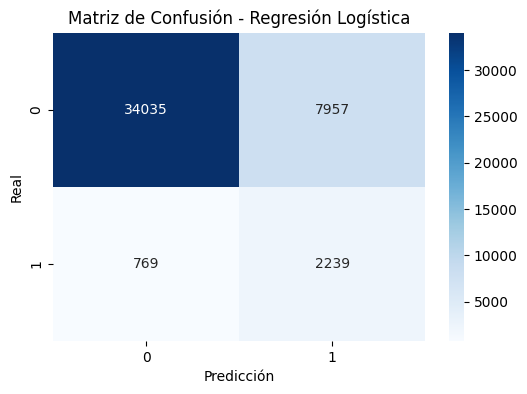

In [32]:
# Predicción binaria
y_pred_lr = grid_lr.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

### ***9.2 Classification Report***

In [33]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89     41992
           1       0.22      0.74      0.34      3008

    accuracy                           0.81     45000
   macro avg       0.60      0.78      0.61     45000
weighted avg       0.93      0.81      0.85     45000



### ***9.3 Curva ROC y AUC***

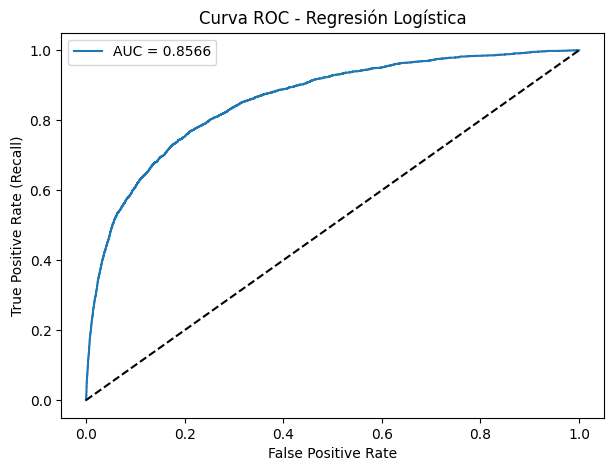

In [34]:
# Probabilidad de clase positiva
y_proba_lr = grid_lr.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_lr:.4f}")
plt.plot([0,1], [0,1], 'k--')  # Línea base
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Curva ROC - Regresión Logística")
plt.legend()
plt.show()

#### ***9.4 Interpretación de Resultados***

1. Matriz de Confusión:

    El modelo identifica correctamente la mayoría de los morosos (VP), y aunque genera falsos positivos, es preferible en procesos de riesgo para evitar aprobar clientes peligrosos.

2. Classification Report:

    Recall alto → excelente para minimizar pérdidas por default.

    Precision moderada

3. Curva ROC y AUC:

    Un AUC de ~0.85 demuestra que el modelo separa correctamente ambas clases, logrando un desempeño sólido y consistente.

[Regresar a la Tabla de Contenido](#id0)

<div id = "id10" >

## **10. Comunicación ejecutiva de resultados**

El modelo final seleccionado fue la Regresión Logística optimizada con GridSearchCV, debido a su alto Recall, excelente capacidad predictiva (AUC) y su interpretabilidad, un aspecto crítico en modelos de riesgo financiero sujetos a regulación.

**Hallazgos principales**

Variables más influyentes en la probabilidad de default

- NumberOfTimes90DaysLate

    Es el predictor más fuerte. Clientes con historial de mora grave tienden a reincidir.

- NumberOfTime60-89DaysPastDueNotWorse

    Señala comportamientos de pago riesgosos y tendencia a deterioro.

- NumberOfTime30-59DaysPastDueNotWorse

    Indica moras tempranas recurrentes, precursoras de default severo.

- RevolvingUtilizationOfUnsecuredLines

    Altos niveles de uso de crédito no garantizado aumentan la probabilidad de impago.

- DebtRatio

    Clientes con razón de endeudamiento elevada muestran mayor vulnerabilidad financiera.

- MonthlyIncome

    Ingresos bajos o variables reducen la capacidad de pago sostenida.

**Impacto estratégico en la gestión del riesgo**

- Mejora en la detección de clientes de alto riesgo

    El modelo logra un Recall del 74%, identificando correctamente a la mayoría de clientes que caerán en morosidad, lo cual reduce pérdidas y evita aprobaciones peligrosas.

- Herramienta alineada con regulaciones

    La Regresión Logística es un método transparente y explicable, facilitando auditorías, seguimiento regulatorio y toma de decisiones basada en evidencia.

- Optimización mediante GridSearchCV

    La búsqueda exhaustiva de hiperparámetros mejoró su desempeño, alcanzando un AUC de 0.856, garantizando un score estable y generalizable.

- Soporte para decisiones más seguras

    Permite:

    - Ajustar políticas de crédito

    - Asignar límites y tasas diferenciadas

    - Detectar señales tempranas de deterioro

    - Reducir el riesgo total del portafolio

**Recomendaciones**

1. Implementar el modelo dentro del flujo de aprobación crediticia

- Los clientes con una probabilidad de default alta deben ser:

    - evaluados manualmente

    - sujetos a condiciones más estrictas

    - o rechazados según política

2. Reforzar estrategias de mitigación para perfiles de riesgo

- Clientes con señales tempranas (moras 30–59 días) deben ingresar a:

    - programas de educación financiera

    - recordatorios automatizados

    - planes de refinanciación preventiva

[Regresar a la Tabla de Contenido](#id0)

<div id = "id11" >

## **11. Guardado del Modelo para la Web-App**

In [36]:
feature_columns = X_train.columns  # <-- columnas originales ANTES de escalar
joblib.dump(grid_lr, "../Models/final_model.pkl")
joblib.dump(scaler, "../Models/scaler.pkl")
joblib.dump(list(feature_columns), "../Models/columns.pkl")

['../Models/columns.pkl']

[Regresar a la Tabla de Contenido](#id0)